In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Algerian_forest_fires_dataset.csv')
df.head()
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

Data cleaning 

In [4]:
print(df.isnull().sum())
print(df.isnull().any(axis=1))
df[df.isnull().any(axis=1)]

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64
0      False
1      False
2      False
3      False
4      False
       ...  
242    False
243    False
244    False
245    False
246    False
Length: 247, dtype: bool


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [5]:
#there are two regions so we will add one more column naming regions so that one region can get one and other as 2
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [6]:
print(df.isnull().sum())
print(df.isnull().any(axis=1))
df[df.isnull().any(axis=1)]

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64
0      False
1      False
2      False
3      False
4      False
       ...  
242    False
243    False
244    False
245    False
246    False
Length: 247, dtype: bool


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [7]:
df=df.dropna().reset_index(drop=True)

In [8]:
print(df.isnull().sum())
print(df.isnull().any(axis=1))
df[df.isnull().any(axis=1)]

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64
0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [9]:
df=df.drop(122)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [10]:
df.columns
df.columns = df.columns.str.strip()
df.columns
df['Classes']

0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
239         fire   
240     not fire   
241     not fire   
242     not fire   
243    not fire    
Name: Classes, Length: 243, dtype: object

In [11]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv')
df


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [12]:

df.loc[:122,'Region']=0
df.loc[122:,'Region']=1
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [13]:

print(df.isnull().sum())
print(df.isnull().any(axis=1))
df[df.isnull().any(axis=1)]


day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64
0      False
1      False
2      False
3      False
4      False
       ...  
242    False
243    False
244    False
245    False
246    False
Length: 247, dtype: bool


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [14]:
df=df.dropna().reset_index(drop=True)

In [15]:
print(df.isnull().sum())
print(df.isnull().any(axis=1))
df[df.isnull().any(axis=1)]

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64
0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [16]:
df=df.drop(122)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [17]:
df = pd.read_csv('Algerian_cleaned_dataset')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.6+ KB


In [18]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [19]:
df['Classes'].unique

<bound method Series.unique of 0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
238         fire   
239     not fire   
240     not fire   
241     not fire   
242    not fire    
Name: Classes, Length: 243, dtype: object>

In [20]:
df['Classes']=df['Classes'].astype(str)
df['Classes'].unique

<bound method Series.unique of 0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
238         fire   
239     not fire   
240     not fire   
241     not fire   
242    not fire    
Name: Classes, Length: 243, dtype: object>

In [21]:
df['Classes']=df['Classes'].str.strip()
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [22]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [23]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [24]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1.0


In [25]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [26]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [27]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [28]:
#Assign independent and dependent features 
X = df.drop('FWI',axis=1)
Y = df['FWI']

In [29]:
X.head()
type(X)

pandas.core.frame.DataFrame

In [30]:
Y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [31]:
#now we need to do train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [32]:
print(X_train.value_counts().sum())
print(X_test.value_counts().sum())
print(Y_train.value_counts().sum())
print(Y_test.value_counts().sum())

194
49
194
49


feature selection

In [33]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


<Axes: >

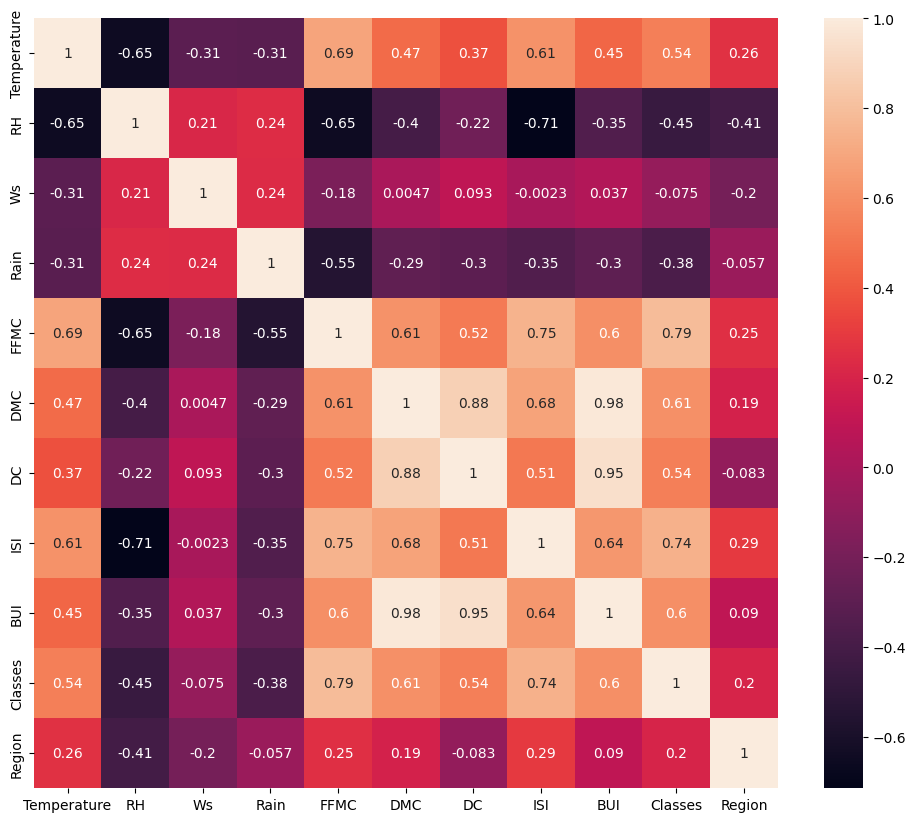

In [34]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)

In [35]:
print(len(X_train.corr().columns))
type(X_train)

11


pandas.core.frame.DataFrame

In [36]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                column_name = corr_matrix.columns[i]
                col_corr.add(column_name)
    return col_corr

In [37]:
corr_features = correlation(X_train,0.85)

In [38]:
corr_features

{'BUI', 'DC'}

In [39]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [40]:
X_train.shape,X_test.shape

((194, 9), (49, 9))

In [41]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.79648833,
        -1.14434427, -1.01036297],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  1.88757476,
         0.8738629 ,  0.98974332],
       [ 1.5942444 , -1.25454906, -0.99568804, ..., -0.19488798,
         0.8738629 ,  0.98974332],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -1.0972885 ,
        -1.14434427, -1.01036297],
       [ 0.49652155, -0.18708188,  0.14504117, ...,  0.56868169,
         0.8738629 ,  0.98974332],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -0.88904223,
        -1.14434427, -1.01036297]], shape=(194, 9))

In [42]:
#linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
regression.coef_,regression.intercept_

(array([-0.02653611, -0.1808412 , -0.01415259, -0.0330928 , -0.82478219,
         3.80917655,  4.89287492,  0.39085739, -0.4004259 ]),
 np.float64(7.420103092783505))

In [44]:
y_pred_train = regression.predict(X_train)
y_pred_train

array([ 1.19178192, 29.52891534,  5.56749571, 17.3136525 , 19.4898898 ,
       13.86793625, 16.1227476 ,  0.64747866,  9.01177307,  3.60696356,
       14.6634537 ,  5.1585678 ,  0.77683889, -0.48907259, 22.07981669,
        3.20993818,  1.68017991,  9.7382679 ,  6.95179461, 10.48053255,
       -0.3127492 ,  8.22379852, 12.42919318, 15.19516766, 12.50453517,
        0.13640648,  1.39171614, -0.21794501,  3.03991994, 13.91246106,
       -0.95912595,  9.4851017 ,  5.31216284,  6.72558404,  9.66085202,
       29.38017005,  0.65250864,  0.11697564,  1.24644685,  7.1416834 ,
        5.30139982,  3.12654326, -0.29196993,  0.48706684,  1.56052225,
        4.26492448, -0.05552686, -0.46024042, 19.81923399,  4.57203812,
        1.39888211, 14.10432169, 11.91480266, 14.35607604,  1.23586404,
       14.30691695, 12.34889673,  3.60688297,  0.17814938, 25.25943437,
        0.61629559, -0.19870803, 13.21164018,  4.17021679, -0.12847074,
       19.33736882,  6.61752863, 18.10633765,  6.81227816, 19.61

In [45]:
y_pred_test = regression.predict(X_test)
y_pred_test

array([ 8.22519075e+00,  7.79202229e+00, -2.78790834e-01,  4.35255873e+00,
        6.66767055e+00,  1.40854770e+00,  1.99494070e+00,  7.80961600e+00,
        1.73112949e+00,  3.30891017e+00,  3.45283141e-01,  9.71807910e+00,
        9.35128249e+00,  1.70641667e+01,  1.85271023e+01,  1.24547438e+00,
        1.91190325e+00,  1.15292017e-02,  7.19193092e+00,  3.07552423e+00,
        1.43106426e+00,  2.28565630e-01,  6.60694070e+00,  3.12916618e-01,
        2.11965139e+01,  5.13996171e+00,  5.92667011e+00,  9.81755385e+00,
       -2.52764587e-02,  9.81141259e+00,  6.59659846e+00, -4.24797540e-01,
        1.03857529e+01,  1.45659625e+01,  1.48302531e+00,  4.32843721e-01,
        2.01268203e+00,  6.07941922e+00, -4.77057528e-01, -4.29405448e-01,
        6.69939047e+00,  1.83829007e+00,  8.62235208e+00, -2.55650163e-01,
        1.55137765e+01,  8.31680623e+00,  8.20529717e+00,  1.43655762e+00,
        1.29816715e+01])

In [46]:
#performance metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

mae = mean_absolute_error(Y_test,y_pred_test)
mse = mean_squared_error(Y_test,y_pred_test)
rmse = root_mean_squared_error(Y_test,y_pred_test)
print(mae)
print(mse)
print(rmse)

0.5049978694165663
0.5882990110708648
0.7670065260940514


In [47]:
#to know how accurate my model is
from sklearn.metrics import r2_score

score = r2_score(Y_test,y_pred_test)
score*100

98.05895859259883

In [48]:
adjusted_score = 1-((1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
adjusted_score*100

97.61102596012165

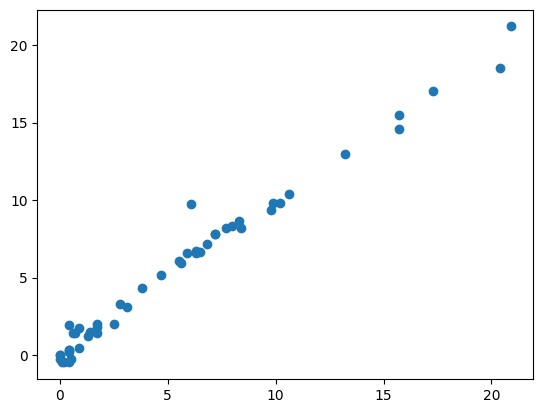

In [49]:
#assumptions
plt.scatter(Y_test,y_pred_test)
plt.show()

#Lasso Regression

In [50]:

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,Y_train)


,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [51]:
lasso.alpha

1.0

In [52]:
lasso.intercept_

np.float64(7.420103092783505)

In [53]:
lasso.coef_

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
        3.11343121,  4.04219354,  0.        , -0.        ])

In [54]:
Y_train

115     0.7
207    30.3
158     5.2
132    16.7
84     20.9
       ... 
106     0.0
14      0.1
92      0.1
179    10.9
102     0.3
Name: FWI, Length: 194, dtype: float64

In [55]:
Y_pred_train = lasso.predict(X_train)
Y_pred_train

array([ 1.88595631e+00,  2.60432266e+01,  6.10641981e+00,  1.60448782e+01,
        1.72478870e+01,  1.26025121e+01,  1.44423900e+01,  2.36107124e+00,
        9.18212910e+00,  4.70492406e+00,  1.37420772e+01,  5.88058245e+00,
        1.99400559e+00,  8.25811164e-01,  2.00633534e+01,  3.92391234e+00,
        2.54813163e+00,  9.15454807e+00,  7.41543369e+00,  1.02165592e+01,
       -4.25126348e-01,  7.86856557e+00,  1.20852971e+01,  1.37767134e+01,
        1.13669114e+01,  1.43518779e-01,  2.17774283e+00,  1.78682814e+00,
        3.45398655e+00,  1.26029210e+01, -2.34245443e-02,  9.65351205e+00,
        6.19808402e+00,  6.68212007e+00,  9.73479798e+00,  2.59731366e+01,
        2.33722219e+00,  4.91924517e-01,  1.23684292e+00,  7.00854275e+00,
        5.61719463e+00,  4.29056916e+00,  3.50696231e-01,  2.46912052e+00,
        3.24348595e+00,  4.76609293e+00,  9.33860449e-01,  1.11013373e+00,
        1.80567104e+01,  4.58048969e+00,  2.45833342e+00,  1.34465587e+01,
        1.16381720e+01,  

In [56]:
Y_test

24      8.4
6       7.2
152     0.5
232     3.8
238     6.5
175     0.7
215     2.5
150     7.2
9       0.9
113     2.8
45      0.4
209     6.1
227     9.8
170    17.3
82     20.4
161     1.3
236     0.4
15      0.0
66      6.8
127     3.1
33      1.7
19      0.4
108     5.9
30      0.4
185    20.9
164     4.7
10      5.6
73     10.2
93      0.0
155     9.9
111     6.3
217     0.4
25     10.6
60     15.7
18      1.4
126     0.9
96      1.7
196     5.5
137     0.1
240     0.2
75      6.3
117     1.7
112     8.3
16      0.0
195    15.7
67      8.0
167     7.7
38      0.6
180    13.2
Name: FWI, dtype: float64

In [57]:
Y_pred_test = lasso.predict(X_test)
Y_pred_test

array([ 7.88909147,  7.51829384,  1.05683766,  5.59521157,  7.19601197,
        2.9904764 ,  3.30716029,  7.92973443,  2.65285777,  3.94402941,
        1.49545045,  9.95958703,  9.44073663, 15.85531238, 16.42022553,
        2.94983343,  2.57052352, -0.42326036,  7.13525194,  4.07406175,
        2.79367722,  0.82394517,  6.49651683,  0.79636414, 19.34082692,
        5.79451622,  5.89364439,  9.22090607, -0.66175082,  9.89719165,
        6.59978582,  1.06056964,  9.68295907, 13.13920478,  2.58276778,
        2.28579212,  2.60101886,  6.47535145,  0.36002619,  0.38014325,
        6.35237424,  2.94050348,  8.15702895, -0.56635463, 14.5909041 ,
        8.01206868,  8.59937372,  2.03651455, 12.51685475])

In [58]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

mae = mean_absolute_error(Y_test,Y_pred_test)
mse = mean_squared_error(Y_test,Y_pred_test)
rmse = root_mean_squared_error(Y_test,Y_pred_test)
print(mae)
print(mse)
print(rmse)

1.0093958923873407
1.726042325023142
1.31378930008702


In [59]:
#to know how accurate my model is
from sklearn.metrics import r2_score

score = r2_score(Y_test,Y_pred_test)
score*100

94.30507350726562

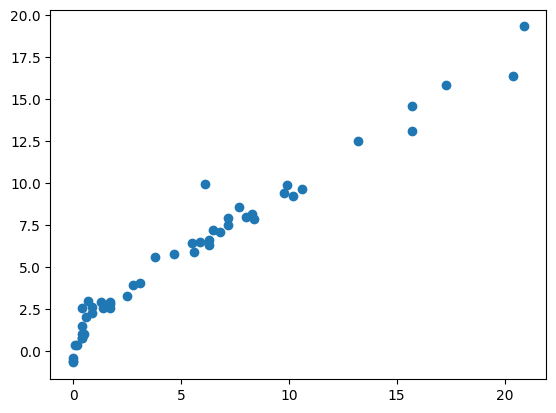

In [60]:
plt.scatter(Y_test,Y_pred_test)
plt.show()

In [61]:
#applyting rige regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,Y_train)


,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [65]:
ridge.intercept_

np.float64(7.420103092783505)

In [66]:
ridge.coef_

array([-2.05596267e-02, -2.10537053e-01,  3.49053966e-03, -3.25138965e-02,
       -7.87549769e-01,  3.79581263e+00,  4.80287749e+00,  4.17790706e-01,
       -3.94439571e-01])

In [67]:
ridge.alpha

1.0

In [68]:
Y_pred_train_ridge = ridge.predict(X_train)
Y_pred_train_ridge

array([ 1.22169432, 29.43139836,  5.66413226, 17.2701366 , 19.41307733,
       13.85366395, 16.11624031,  0.70266277,  9.04216136,  3.65017757,
       14.67617345,  5.23970234,  0.79805808, -0.49652475, 21.97108096,
        3.25063335,  1.73359374,  9.75920157,  7.00618046, 10.54405163,
       -0.35545165,  8.2318596 , 12.42021842, 15.16195578, 12.5087909 ,
        0.08428963,  1.41271015, -0.14211508,  3.09397318, 13.89260101,
       -1.00355778,  9.50423122,  5.32557779,  6.74375802,  9.6818793 ,
       29.27163215,  0.70475025,  0.10840491,  1.22024015,  7.15965203,
        5.3344409 ,  3.10610688, -0.3201417 ,  0.51393657,  1.58455473,
        4.25468853, -0.04898846, -0.45796323, 19.76613013,  4.6669605 ,
        1.38739043, 14.0841909 , 11.91920024, 14.33692107,  1.30399239,
       14.29417966, 12.33001546,  3.73874368,  0.24399059, 25.12622372,
        0.65462372, -0.21177787, 13.20191816,  4.20980717, -0.15952691,
       19.27980046,  6.64987603, 18.07609209,  6.81606345, 19.56

In [70]:
Y_pred_test_ridge = ridge.predict(X_test)
Y_pred_test_ridge

array([ 8.23999312,  7.81028989, -0.23449906,  4.37975018,  6.70382589,
        1.41841778,  2.04982548,  7.90208798,  1.69756041,  3.37297157,
        0.39150334,  9.7381109 ,  9.37049213, 17.04397828, 18.48718859,
        1.31540983,  1.88742994, -0.09632557,  7.19071883,  3.15401501,
        1.43532282,  0.20239301,  6.63902509,  0.32619204, 21.09374547,
        5.23449032,  5.96410806,  9.8326125 , -0.13641814,  9.83127738,
        6.60502163, -0.40725925, 10.39643639, 14.56103886,  1.52662903,
        0.47240481,  2.06496849,  6.17073039, -0.53249536, -0.40158768,
        6.75573837,  1.85431958,  8.63495118, -0.33798018, 15.48377627,
        8.33235668,  8.22165908,  1.43370936, 12.98313436])

In [71]:
#performance metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

mae = mean_absolute_error(Y_test,Y_pred_test_ridge)
mse = mean_squared_error(Y_test,Y_pred_test_ridge)
rmse = root_mean_squared_error(Y_test,Y_pred_test_ridge)
print(mae)
print(mse)
print(rmse)


0.5192048325844728
0.6029616070548557
0.7765060251246321


In [72]:
from sklearn.metrics import r2_score

score = r2_score(Y_test,Y_pred_test_ridge)
score*100

98.01058063273602

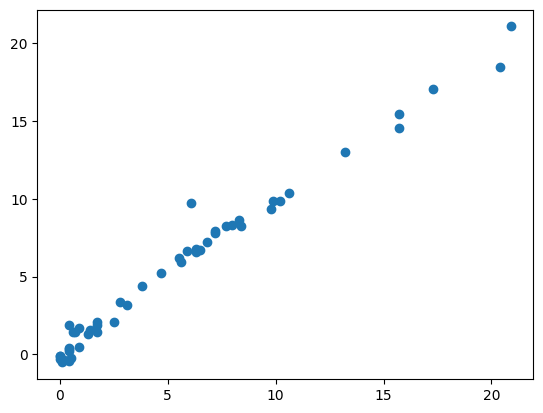

In [73]:
plt.scatter(Y_test,Y_pred_test_ridge)
plt.show()

In [75]:
from sklearn.linear_model import RidgeCV
ridegeCV = RidgeCV(cv=5)
ridegeCV.fit(X_train,Y_train)

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,5
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


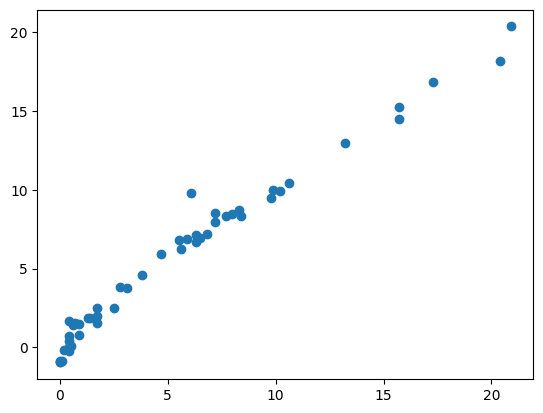

In [78]:
Y_pred_test_CV = ridegeCV.predict(X_test)
plt.scatter(Y_test,Y_pred_test_CV)

In [79]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(Y_test,Y_pred_test_ridge)
print(mae)
score = r2_score(Y_test,Y_pred_test_ridge)
score*100

0.5192048325844728


98.01058063273602

In [80]:
#now we will pickle the models, and preprocessing files in order to use it for deployment 
scaler

,copy,True
,with_mean,True
,with_std,True


In [81]:
ridge

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [82]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))